<a href="https://colab.research.google.com/github/rituraj6908/tuberculosis_prediction_shenzhen/blob/main/shenzhen_tuberculosis_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tuberculosis Chest X-rays (Shenzhen)**

Link - https://www.kaggle.com/raddar/tuberculosis-chest-xrays-shenzhen

Total - 663

Normal - 326

Tuberculosis - 336

pixel size - 3k*3k

In [1]:
# !pip install tensorflow-gpu|

In [2]:
# !nvidia-smi

In [21]:
# importing all the necessary files
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix



In [4]:
# setting the data file path
dir_path = "/content/drive/MyDrive/Shenzhen_chest_X-ray_set"
train_path = dir_path + "/train"
valid_path = dir_path + "/valid"
test_path = dir_path + "/test"

In [5]:
path_lst = [train_path, valid_path, test_path]

for path_item in path_lst:
  print(f"{os.path.basename(path_item)}")
  path_link, dirs, files = next(os.walk(path_item+'/normal'))
  print(f"normal: {len(files)}")
  path_link, dirs, files = next(os.walk(path_item+'/tuberculosis'))
  print(f"tuberculosis: {len(files)}")
  print()

train
normal: 200
tuberculosis: 200

valid
normal: 100
tuberculosis: 100

test
normal: 26
tuberculosis: 36



In [18]:
image_size = 512
num_batches = 10
num_epochs = 15

In [19]:
# preprocesing the train images and valid images

train_batches = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True).flow_from_directory(directory=train_path, 
                                                                             target_size=(image_size, image_size), 
                                                                             classes=['normal', 'tuberculosis'], 
                                                                             batch_size=10)

valid_batches = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=valid_path, 
                                                                          target_size=(image_size, image_size), 
                                                                          classes=['normal', 'tuberculosis'], 
                                                                          batch_size=10)

# target_size downsize the image into 244*244 pixels
# classes represents the label
# batch_size means each batch of train data will contain 10 images

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [15]:
# function to plot images in the form of a grid with 1 row and 10 columns to display all the images in a batch

def plotImages(images_batch):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_batch, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [16]:
def batchItem(batches):
  images, labels = next(train_batches)
  plotImages(images)
  print(f"Labels:\n {labels}")
  print(f"Class indices: {batches.class_indices}")

#label is one-hot encoded i.e there will be two column (as there is two classes only) in labels. 
# So, 1st column (0 index) will represent normal and 2nd column (1 index) will represnt tuberculosis.
# if the 1st column = 1 and 2nd column = 0, then the image is labeled as normal.
# if the 1st column = 0 and 2nd column = 1, then the image is labeled as tuberculosis.

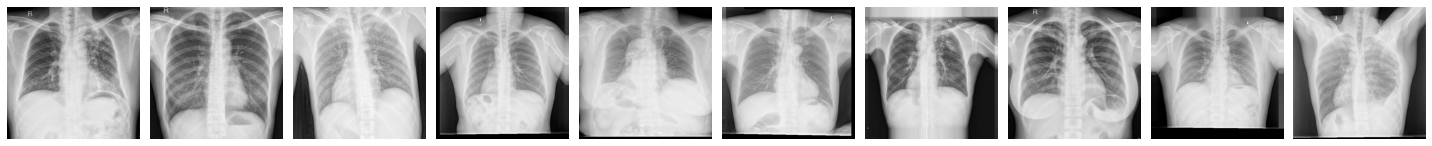

Labels:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Class indices: {'normal': 0, 'tuberculosis': 1}


In [17]:
batchItem(train_batches)

In [25]:
# creating a sequential model 
model = Sequential([
    # input size should be similar to image size with 3 byte color (RGB)
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(image_size, image_size, 3)), #convulational layer
    MaxPool2D(pool_size=(3,3), strides=2), #max-pooling layer

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(3,3), strides=2),

    Conv2D(filters=48, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(3,3), strides=2),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=2),

    Conv2D(filters=80, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=2),

    GlobalAveragePooling2D(),

    Dense(units=2, activation='sigmoid') # sigmoid activation function is used because it is a binary classification
])

In [26]:
# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 254, 254, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 123, 123, 48)      13872     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 61, 61, 48)      

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [28]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=1)

Epoch 1/15
40/40 [==============================] - 337s 8s/step - loss: 0.6936 - accuracy: 0.4950 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/15
40/40 [==============================] - 150s 4s/step - loss: 0.6919 - accuracy: 0.4925 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/15
40/40 [==============================] - 145s 4s/step - loss: 0.6899 - accuracy: 0.5300 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/15
40/40 [==============================] - 140s 3s/step - loss: 0.6906 - accuracy: 0.5550 - val_loss: 0.6836 - val_accuracy: 0.6500
Epoch 5/15
40/40 [==============================] - 218s 5s/step - loss: 0.6790 - accuracy: 0.6275 - val_loss: 0.6739 - val_accuracy: 0.6500
Epoch 6/15
40/40 [==============================] - 260s 6s/step - loss: 0.6748 - accuracy: 0.5950 - val_loss: 0.6689 - val_accuracy: 0.5450
Epoch 7/15
40/40 [==============================] - 144s 4s/step - loss: 0.6460 - accuracy: 0.6625 - val_loss: 0.6384 - val_accuracy: 0.6500
Epoch 8/15
40

In [2]:

# this functions plots accuracy vs val_accuracy over the 15 epochs
def plot_acc_vs_val_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracies')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

# this functions plots loss vs val_loss over the 15 epochs
def plot_loss_vs_val_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

In [4]:
plot_acc_vs_val_acc(history)
plot_loss_vs_val_loss(history)

In [1]:
print(f"Mean accuracy: {np.mean(history.history['accuracy'])}")
print(f"Std of accuracy: {np.std(history.history['accuracy'])}")
print()
print(f"Mean val_accuracy: {np.mean(history.history['val_accuracy'])}")
print(f"Std of val_accuracy: {np.std(history.history['val_accuracy'])}")

In [ ]:
print(f"Mean loss: {np.mean(history.history['loss'])}")
print(f"Std of loss: {np.std(history.history['loss'])}")
print()
print(f"Mean val_loss {np.mean(history.history['val_loss'])}")
print(f"Std of val_loss: {np.std(history.history['val_loss'])}")